In [1]:
# project: p2
# submitter: Ainesh Mohan
# partner: none
# hours: 5

In [2]:
# import statements
%load_ext autoreload
%autoreload 2

import loans
import search
from time import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Q1
csb = loans.Bank("Charles Schwab Bank, SSB")
csb.load_from_zip("./wi.zip")
csb.average_interest_rate()

2.957772277227724

In [4]:
#Q2
csb.num_applicants()/len(csb)

1.7227722772277227

In [5]:
#Q3
csb.ages_dict()

{'25-34': 5, '35-44': 25, '45-54': 36, '55-64': 55, '65-74': 41, '>74': 12}

In [6]:
#Q4
t = search.BST()
for i in range(len(csb)):
    t.add(csb[i].interest_rate, csb[i])

len(t[-1])

1

In [7]:
#Q5
t.get_height()

9

<AxesSubplot:xlabel='BST Adds', ylabel='Total Ellapsed Milliseconds'>

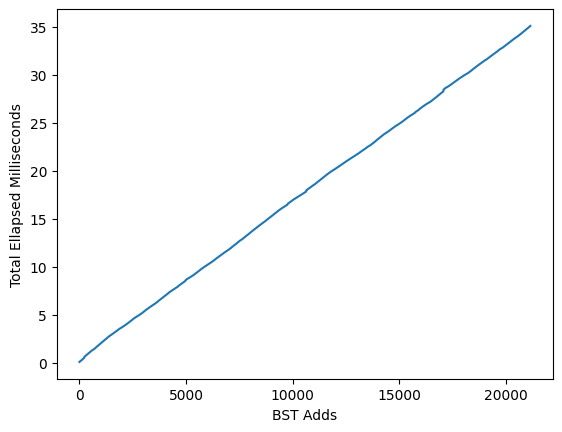

In [8]:
#Q6
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu.load_from_zip("./wi.zip")
uwcu_tree = search.BST()
times = []
t1 = time()
for i in range(len(uwcu)):
    uwcu_tree.add(uwcu[i].interest_rate, uwcu[i])
    t2 = time()
    times.append((t2-t1)*1000)
times_df = pd.DataFrame(times)
times_df.plot.line(xlabel = "BST Adds", ylabel = "Total Ellapsed Milliseconds", legend = False)

<AxesSubplot:ylabel='Milliseconds'>

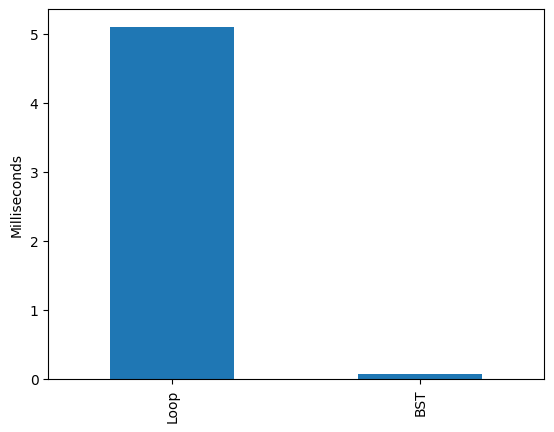

In [9]:
#Q7
t1 = time()
count = 0
for loan in uwcu.loans:
    if loan.interest_rate == -1:
        count += 1
t2 = time()
looping_time = (t2 - t1) * 1000  # in milliseconds

t3 = time()
len(uwcu_tree[-1])
t4 = time()
bst_time = (t4-t3) * 1000

data = {
    'Task': ['Loop', 'BST'],
    'Milliseconds': [looping_time, bst_time]
}
df = pd.DataFrame(data)
df.plot.bar(x = 'Task', y = 'Milliseconds', legend = False, ylabel = 'Milliseconds', xlabel = "")

Text(0, 0.5, 'Number of Applicants')

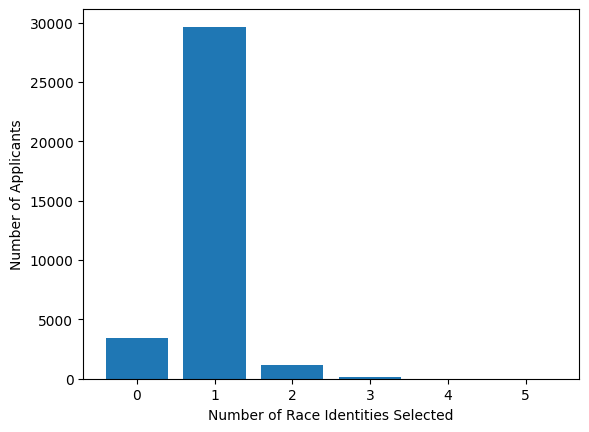

In [10]:
#Q8
data = {}
for loan in uwcu.loans:
    for applicant in loan.applicants:
        num_races = len(applicant.race)
        if num_races in data:
            data[num_races] += 1
        else:
            data[num_races] = 1
x_vals = list(data.keys())
y_vals = list(data.values())
plt.bar(x_vals, y_vals)
plt.xlabel("Number of Race Identities Selected")
plt.ylabel("Number of Applicants")

In [11]:
#Q9
uwcu_tree.num_leafs()

9

In [12]:
#Q10
uwcu_tree.top_n_keys(4)[3]

5.0